In [ ]:
pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup


In [ ]:
import json
import pandas as pd
import re

# 1. Load the JSON file
with open("body+wash.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data)

# ------------------------------------------------------------------------------
# 2. Extract numeric price

# Example price format: "‏9.50 ريال" or "‏18.95 ريال"
# Strategy: remove any non-digit or non-dot characters, then convert to float.
def clean_price(price_str):
    # Remove all characters except digits and dots.
    numeric_str = re.sub(r"[^\d\.]", "", price_str)
    # Convert to float
    try:
        return float(numeric_str)
    except ValueError:
        # If conversion fails, return None
        return None

df["price_numeric"] = df["price"].apply(clean_price)

# ------------------------------------------------------------------------------
# 3. Extract numeric rating

# Example rating format: "4.2 من 5 نجوم"
# Strategy: remove all characters except digits and dots and convert to float.
def clean_rating(rating_str):
    numeric_str = re.sub(r"[^\d\.]", "", rating_str)
    try:
        return float(numeric_str)
    except ValueError:
        return None

df["rating_numeric"] = df["rating"].apply(clean_rating)

# ------------------------------------------------------------------------------
# 4. Extract volume from the title
# We assume the title might contain something like "750 مل" or "400 مل".
# We only want the digits, e.g., 750 or 400.

def extract_volume(title_str):
    # Look for one or more digits followed by optional spaces then "مل"
    match = re.search(r"(\d+)\s*مل", title_str)
    if match:
        return float(match.group(1))
    return None

df["volume"] = df["title"].apply(extract_volume)

# ------------------------------------------------------------------------------
# Final cleaned DataFrame
print(df)


                                                title         price  \
0             جل استحمام سيكريتس اصفر من لوركس 800 مل    ‏9.50 ريال   
1    جل استحمام لي كاسوك من بيوريفيرا 750 مل، بيرفيرا    ‏9.99 ريال   
2   غسول الجسم فيتا ريتش من جونسون، جل استحمام مهد...    ‏9.29 ريال   
3   غسول الجسم من لوكس، سحر زهرة الأوركيد الجديد، ...   ‏27.95 ريال   
4   جونسون غسول الجسم المغذي بتوت العليق 400مل يسا...   ‏23.00 ريال   
5    جل استحمام جلوبال ستار بالعسل والفانيليا 1200 مل   ‏13.37 ريال   
6   جل الاستحمام اتوديرم فائق النعومة خالٍ من الصا...   ‏56.93 ريال   
7   جل استحمام منعش وغسول للجسم - ديتول برائحة الو...   ‏30.30 ريال   
8         غسول استحمام التغذية العميقة من دوف، 500 مل   ‏25.97 ريال   
9   غسول الجسم جنتلمان كلاسيك للرجال من ياردلي لند...   ‏28.75 ريال   
10  غسول الجسم من فايث اند نايتشر - جوز الهند 400 ...   ‏19.98 ريال   
11  غسول الجسم من لوكس، الورد الناعم، ٢ مكون مرطب،...   ‏27.95 ريال   
12  سانت باتريك غسول جسم مقشر بالمشمش للنساء من اي...   ‏16.47 ريال   
13    

In [ ]:
"""def scrape_brand_name(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP issues

        # Parse the page content with Beautiful Soup
        soup = BeautifulSoup(response.content, "html.parser")

        # Example: Find the brand name on the page (update this selector based on the actual page structure)
        brand_tag = soup.find("tr", class_="a-spacing-small po-brand")
        if brand_tag:
            td_tag = brand_tag.find("td", class_="a-span9")
            if td_tag:
                span_tag = td_tag.find("span", class_="a-size-base a-break-word")
                if span_tag:
                    return span_tag.get_text(strip=True)

        # Return None if the brand name is not found
        return None

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Add a new column to the DataFrame by applying the function to each row
df["brand_name"] = df["link"].apply(scrape_brand_name)

# Display the updated DataFrame
print(df)"""

Error scraping https://www.amazon.sa/%D8%A7%D8%B3%D8%AA%D8%AD%D9%85%D8%A7%D9%85-%D8%B3%D9%8A%D9%83%D8%B1%D9%8A%D8%AA%D8%B3-%D8%A7%D8%B5%D9%81%D8%B1-%D9%84%D9%88%D8%B1%D9%83%D8%B3-800/dp/B0BYPHM7ZM: 500 Server Error:  for url: https://www.amazon.sa/%D8%A7%D8%B3%D8%AA%D8%AD%D9%85%D8%A7%D9%85-%D8%B3%D9%8A%D9%83%D8%B1%D9%8A%D8%AA%D8%B3-%D8%A7%D8%B5%D9%81%D8%B1-%D9%84%D9%88%D8%B1%D9%83%D8%B3-800/dp/B0BYPHM7ZM
Error scraping https://www.amazon.sa/%D8%A7%D8%B3%D8%AA%D8%AD%D9%85%D8%A7%D9%85-%D8%B3%D9%8A%D9%83%D8%B1%D9%8A%D8%AA%D8%B3-%D8%A7%D8%B5%D9%81%D8%B1-%D9%84%D9%88%D8%B1%D9%83%D8%B3-800/dp/B0BYPHM7ZM: 500 Server Error:  for url: https://www.amazon.sa/%D8%A7%D8%B3%D8%AA%D8%AD%D9%85%D8%A7%D9%85-%D8%B3%D9%8A%D9%83%D8%B1%D9%8A%D8%AA%D8%B3-%D8%A7%D8%B5%D9%81%D8%B1-%D9%84%D9%88%D8%B1%D9%83%D8%B3-800/dp/B0BYPHM7ZM
Error scraping https://www.amazon.sa/%D8%A7%D8%B3%D8%AA%D8%AD%D9%85%D8%A7%D9%85-%D8%B3%D9%8A%D9%83%D8%B1%D9%8A%D8%AA%D8%B3-%D8%A7%D8%B5%D9%81%D8%B1-%D9%84%D9%88%D8%B1%D9%83%D8%B3-800/d

KeyboardInterrupt: 

In [ ]:
df_cleaned = (
    df[["title", "price_numeric", "rating_numeric", "volume"]]
    .dropna(subset=["title", "price_numeric", "rating_numeric", "volume"])
)

df_cleaned


,title,price_numeric,rating_numeric,volume
0,جل استحمام سيكريتس اصفر من لوركس 800 مل,9.50,4.25,800.0
1,جل استحمام لي كاسوك من بيوريفيرا 750 مل، بيرفيرا,9.99,4.15,750.0
2,غسول الجسم فيتا ريتش من جونسون، جل استحمام مهد...,9.29,4.55,400.0
3,غسول الجسم من لوكس، سحر زهرة الأوركيد الجديد، ...,27.95,4.55,700.0
4,جونسون غسول الجسم المغذي بتوت العليق 400مل يسا...,23.00,4.45,400.0
5,جل استحمام جلوبال ستار بالعسل والفانيليا 1200 مل,13.37,4.15,1200.0
7,جل استحمام منعش وغسول للجسم - ديتول برائحة الو...,30.30,4.55,250.0
8,غسول استحمام التغذية العميقة من دوف، 500 مل,25.97,4.55,500.0
9,غسول الجسم جنتلمان كلاسيك للرجال من ياردلي لند...,28.75,4.45,650.0
10,غسول الجسم من فايث اند نايتشر - جوز الهند 400 ...,19.98,4.55,400.0


<Axes: xlabel='volume', ylabel='price_numeric'>

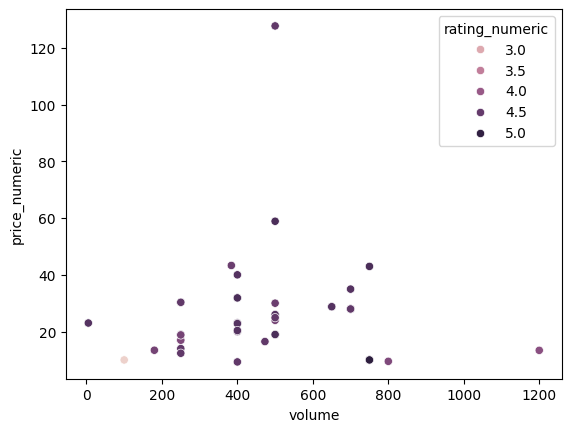

In [ ]:
import seaborn as sns

sns.scatterplot(data = df_cleaned, x = 'volume', y = 'price_numeric', hue = 'rating_numeric')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned[['volume', 'price_numeric']], df_cleaned[['rating_numeric']], test_size=0.15, random_state=0)

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='volume', ylabel='price_numeric'>

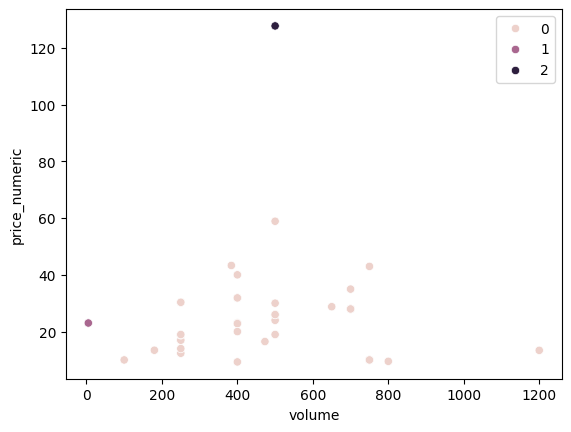

In [ ]:
sns.scatterplot(data = X_train, x = 'volume', y = 'price_numeric', hue = kmeans.labels_)